In [1]:
import pandas as pd
import sqlite3 as sq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from IPython.display import display, clear_output
import ipywidgets as widgets
from IPython.core.display import HTML
from scipy.stats import ttest_ind
import rpy2
%load_ext rpy2.ipython

In [2]:
# AESTHETICS

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# COLOR BLINDNESS

cmap_bli = "gist_gray"
cmap_reg = "PuOr_r"
color_bli = ["grey", "black"]
color_reg = ["#003399", "#a1045a"]

def clicked(arg):
    global cmap
    global color
    clear_output()    
    if button.description == 'Click to ACTIVATE color blindness settings':
        button.description = "Click to DEACTIVATE color blindness settings"
        print("Color blindness settings ON")
        cmap = cmap_bli
        color = color_bli
    else:
        button.description = "Click to ACTIVATE color blindness settings"
        print("Color blindness settings OFF")
        bl_st = False
        cmap = cmap_reg
        color = color_reg
cmap = cmap_reg     
color = color_reg
layout = widgets.Layout(width = "auto", height = 'auto')
print("Color blindness settings OFF")    
    
button = widgets.Button(description = 'Click to ACTIVATE color blindness settings', layout = layout) 
button.on_click(clicked)
display(button)



Color blindness settings OFF


Widget Javascript not detected.  It may not be installed or enabled properly.


In [4]:
# DATABASE

#sqlite3 does not natively support the "with" statement since it has no __enter__ or __exit__ defined

try:
    con = sq.connect("src/Turnover_Data_2.db")
    cursObj = con.cursor()
    #Script to recover the information correctly
    cursObj.execute("SELECT * FROM mainTab;")
    output = pd.DataFrame(cursObj.fetchall())
    con.close()
    
except:
    con.close()
    raise
    
output.index = output[0]
output = output.drop(0, axis = 1)
output.columns = ["stag", "event", "gender", "age", "industry", "profession", "traffic", "coach", "head_gender", "greywage", "way", "extraversion", "independ", "selfcontrol", "anxiety", "novator"]

summary = round(output.describe(),2)
print(summary)

          stag   event      age  extraversion  independ  selfcontrol  anxiety  \
count  1116.00  1116.0  1116.00       1116.00   1116.00      1116.00  1116.00   
mean     36.70     0.5    31.02          5.59      5.47         5.61     5.67   
std      34.17     0.5     6.97          1.86      1.70         1.99     1.71   
min       0.39     0.0    18.00          1.00      1.00         1.00     1.70   
25%      11.72     0.0    26.00          4.60      4.10         4.10     4.80   
50%      24.44     1.0    30.00          5.40      5.50         5.70     5.60   
75%      51.62     1.0    36.00          7.00      6.90         7.20     7.10   
max     179.45     1.0    58.00         10.00     10.00        10.00    10.00   

       novator  
count  1116.00  
mean      5.88  
std       1.90  
min       1.00  
25%       4.40  
50%       6.00  
75%       7.50  
max      10.00  


In [5]:
plt.rcParams['font.size'] = '16'

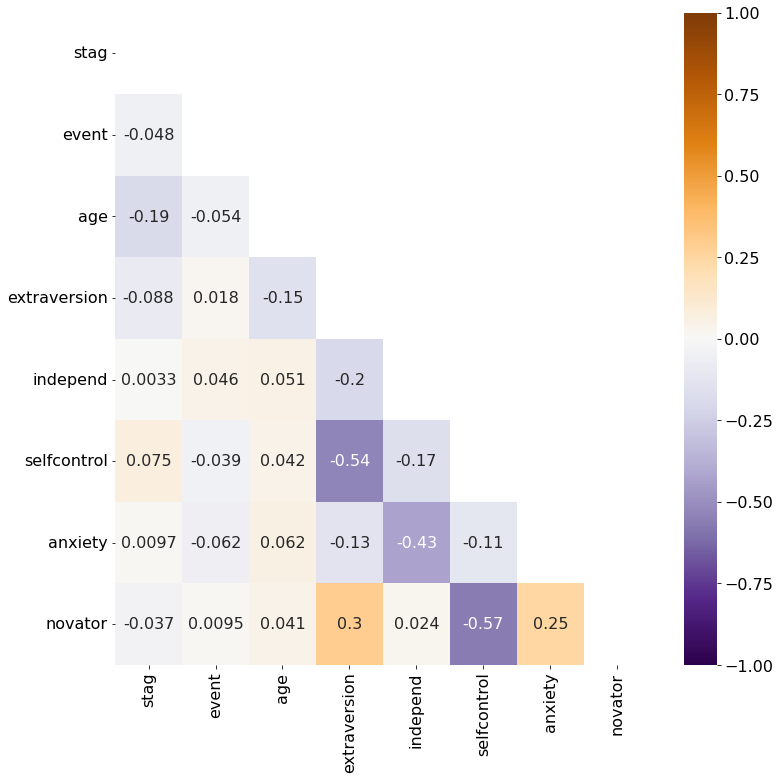

In [6]:
# HEATMAP

f, am = plt.subplots(figsize = (12, 12))
corr = output.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

am = sn.heatmap(corr,mask = mask,annot = True, cmap = cmap, vmin = -1, vmax = 1)
plt.show()

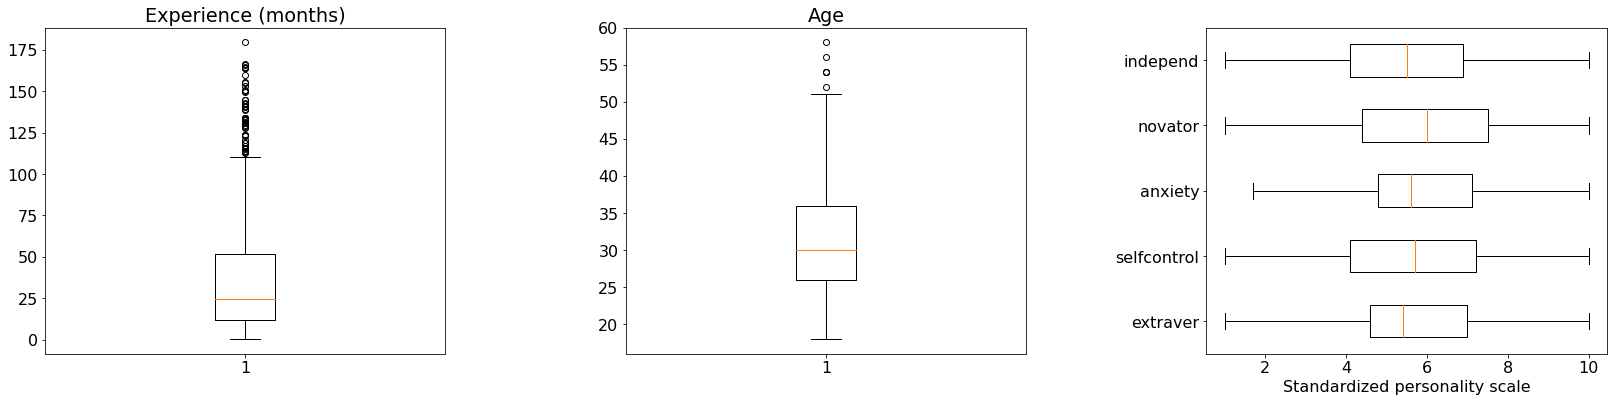

In [7]:
# DESCRIPTION of NUMERICAL VARIABLES

fig, ax = plt.subplots(1, 3, figsize = (28, 6))
fig.subplots_adjust(wspace = 0.45)
ax[2].set_xlabel("Standardized personality scale")
ax[2].boxplot([output["extraversion"], output["selfcontrol"], output["anxiety"], output["novator"], output["independ"]], vert = False)
plt.yticks([1,2,3,4,5],["extraver","selfcontrol","anxiety","novator","independ"])

ax[1].boxplot([output["age"]])
ax[1].set_title("Age")
ax[0].boxplot([output["stag"]])
ax[0].set_title("Experience (months)")
plt.show()

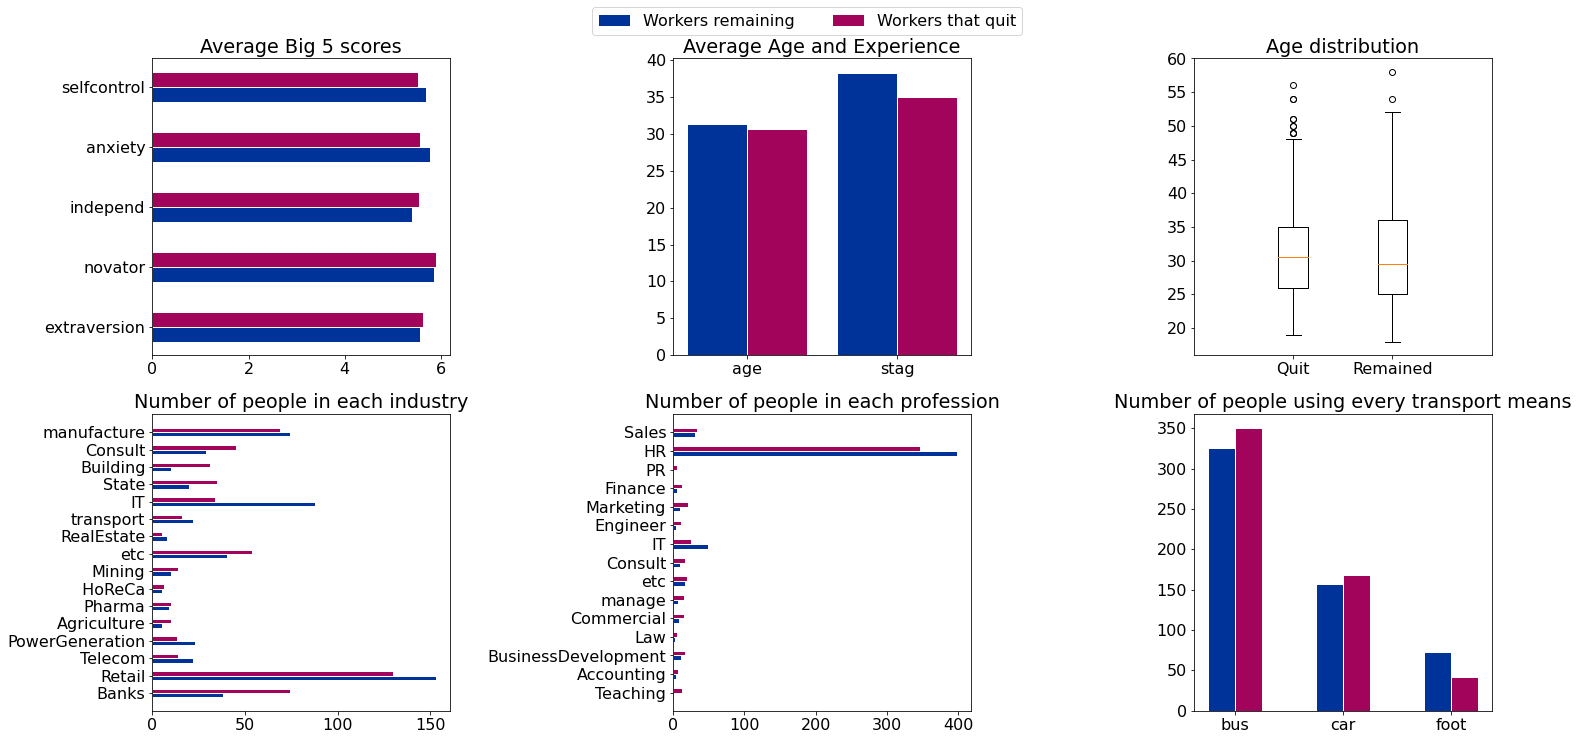

In [8]:
# VARIABLES CONDITIONAL TO 'EVENT'


fig, ax = plt.subplots(2, 3, figsize = (24, 12))
fig.subplots_adjust(wspace = 0.75)
labels1 = ["extraversion", "novator", "independ", "anxiety", "selfcontrol"]
y = [output[i].loc[output["event"] == 0].mean() for i in labels1]
y2 = [output[i].loc[output["event"] == 1].mean() for i in labels1]
x = [i*2 + 0.25 for i in range(len(y))]
x2 = [i*2 + 0.75 for i in range(len(y))]
ax[0][0].barh(x, y, 0.5, color = color[0], edgecolor = "white" )
ax[0][0].barh(x2, y2, 0.5, color = color[1], edgecolor = "white")
ax[0][0].set_yticks([i *2 + 0.5  for i in range(len(labels1))])
ax[0][0].set_yticklabels(labels1) 
ax[0][0].set_title("Average Big 5 scores")


labels8 = ["age", "stag"]
y = [output[i].loc[output["event"] == 0].mean() for i in labels8]
y2 = [output[i].loc[output["event"] == 1].mean() for i in labels8]
x = [i*1.25 + 0.25 for i in range(len(y))]
x2 = [i*1.25 + 0.75 for i in range(len(y))]
ax[0][1].bar(x, y, 0.5, color = color[0], edgecolor = "white" )
ax[0][1].bar(x2, y2, 0.5, color = color[1], edgecolor = "white")
ax[0][1].set_xticks([i *1.25 + 0.5  for i in range(len(labels8))])
ax[0][1].set_xticklabels(labels8) 
ax[0][1].set_title("Average Age and Experience")
ax[0][1].legend(["Workers remaining","Workers that quit"], bbox_to_anchor = (-0.3,1,1.5, 0.2), loc = "upper left", ncol = 3, mode = "expand")

ax[0][2].boxplot([output["age"].loc[output["event"] == 0], output["age"].loc[output["event"] == 1]], positions = [0,0.5])
ax[0][2].set_title("Age distribution")
ax[0][2].set_xticks([0, 0.5])
ax[0][2].set_xticklabels(["Quit", "Remained"])
#ax[0][0].bar(3,2,bottom = 3, color = "black")

labels2 = list(set(output["industry"]))
y = [output["industry"].loc[(output["event"] == 0) & (output["industry"] == i)].count() for i in labels2]
y2 = [output["industry"].loc[(output["event"] == 1) & (output["industry"] == i)].count() for i in labels2]
x = [i*2 + 0.25 for i in range(len(y))]
x2 = [i*2 + 0.75 for i in range(len(y))]
ax[1][0].barh(x, y, 0.5, color = color[0], edgecolor = "white" )
ax[1][0].barh(x2, y2, 0.5, color = color[1], edgecolor = "white")
ax[1][0].set_yticks([i *2 + 0.5  for i in range(len(labels2))])
ax[1][0].set_yticklabels(labels2) 
ax[1][0].set_title("Number of people in each industry")


labels3 = list(set(output["profession"]))
y = [output["profession"].loc[(output["event"] == 0) & (output["profession"] == i)].count() for i in labels3]
y2 = [output["profession"].loc[(output["event"] == 1) & (output["profession"] == i)].count() for i in labels3]
x = [i*2 + 0.25 for i in range(len(y))]
x2 = [i*2 + 0.75 for i in range(len(y))]
ax[1][1].barh(x, y, 0.5, color = color[0], edgecolor = "white" )
ax[1][1].barh(x2, y2, 0.5, color = color[1], edgecolor = "white")
ax[1][1].set_yticks([i *2 + 0.5  for i in range(len(labels3))])
ax[1][1].set_yticklabels(labels3) 
ax[1][1].set_title("Number of people in each profession")


labels7 = list(set(output["way"]))
y = [output["way"].loc[(output["event"] == 0) & (output["way"] == i)].count() for i in labels7]
y2 = [output["way"].loc[(output["event"] == 1) & (output["way"] == i)].count() for i in labels7]
x = [i*2 + 0.25 for i in range(len(y))]
x2 = [i*2 + 0.75 for i in range(len(y))]
ax[1][2].bar(x, y, 0.5, color = color[0], edgecolor = "white" )
ax[1][2].bar(x2, y2, 0.5, color = color[1], edgecolor = "white")
ax[1][2].set_xticks([i *2 + 0.5  for i in range(len(labels7))])
ax[1][2].set_xticklabels(labels7) 
ax[1][2].set_title("Number of people using every transport means")



plt.show()

We could already comment on some findings on the Big 5 measures. However, the differences between groups seem too small. Some Hypothesis tests follow.

In [16]:


xg = output[labels1].loc[output["event"] == 1]
yg = output[labels1].loc[output["event"] == 0]
stat, p = ttest_ind(xg, yg)

pd.DataFrame([(labels1[u] ,np.around(p[u],2), p[u] < 0.05) for u in range(len(p))], columns = ["Dimension", "P-value", "95% confidence"])




,Dimension,P-value,95% confidence
0,extraversion,0.56,False
1,novator,0.75,False
2,independ,0.12,False
3,anxiety,0.04,True
4,selfcontrol,0.19,False


One out of five hypothesis is rejected, but if we want to test for all differences at the same time, we need to account for correlations.

In [19]:
big5 = output[labels1 + ["event"]].copy()
pd.DataFrame(np.corrcoef([output[c] for c in labels1])) # Correlation matrix

,0,1,2,3,4
0,1.000000,0.295594,-0.198470,-0.134200,-0.537204
1,0.295594,1.000000,0.023969,0.248969,-0.565922
2,-0.198470,0.023969,1.000000,-0.426062,-0.166757
3,-0.134200,0.248969,-0.426062,1.000000,-0.111022
4,-0.537204,-0.565922,-0.166757,-0.111022,1.000000


Strong correlations. We need a joint hypothesis.

In [11]:
%%capture
%%R
install.packages("DescTools") # Takes some time
library("DescTools")

In [17]:
%%R -i big5

# H0: B1 = B2 = B3 = B4 = B5 = 0
# H1: B1 != 0 or B2 != 0, or both, or..., or all

big5_event = big5[big5$event == 0, ! names(big5) %in% "event"]
big5_no_event = big5[big5$event == 1, ! names(big5) %in% "event"]


HotellingsT2Test(big5_event, big5_no_event)



	Hotelling's two sample T2-test

data:  big5_event and big5_no_event
T.2 = 1.4276, df1 = 5, df2 = 1110, p-value = 0.2115
alternative hypothesis: true location difference is not equal to c(0,0,0,0,0)



A hotelling version of the t-test was introduced in order to compare the mean vectors of both groups in the sample: those who stayed and those who left.
We cannot reject the null hypothesis (there are no differences between groups), therefore no claims should be made about the sample's means conditional to leaving (in this case)
That applies to anxiety too, which was previously deemed as significantly different between groups. 

In a few words: we cannot draw conclusions on personality measures in our exploratory analysis.

Next, I proceed to perform similar tests for the rest of variables